In [1]:
from midi2vec.graph import midi_to_graph
from midi2vec.train import train_node
from midi2vec.visualise import visualize_graph

### Build the graph based on midi file.

In [2]:
G = midi_to_graph()

In [3]:
train_node(G)

Computing transition probabilities:   0%|          | 0/38006 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [1:05:55<00:00, 19.78s/it]


### Let's visualise the graph!

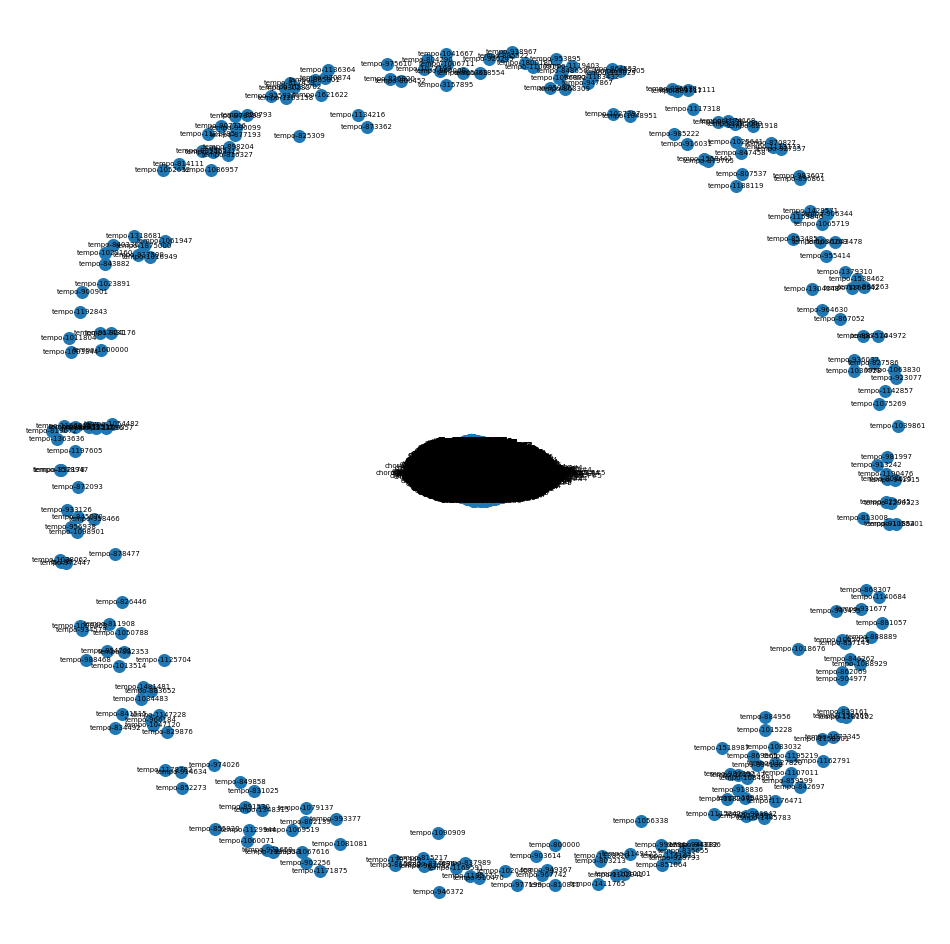

In [4]:
visualize_graph(G)